# Vizualizace dat

Když dostaneme do ruky novou datovou množinu je potřeba se s ní nejdřív seznámit, podívat se, jaká data máme, jestli jsou v nich nějaké závislosti, které by nám pomohly vyřešit jakýkoliv problém, který se snažit řešíme. K tomu slouží několik běžných způsobů zobrazení dat, které si ukážeme v této části.

Jeden z nejjednodušších způsobů, který dobře funguje pro klasifikační množiny s menším počtem cílových tříd a atributů, je tzv. scatterplot matrix, kdy si zobrazíme projekce dat přes každou dvojici atributů a body obarvíme cílovou třídou. Knihovna seaborn na to má dokonce pěknou funkci, která vše udělá za nás a ještě navíc přidá pěkné histogramy.

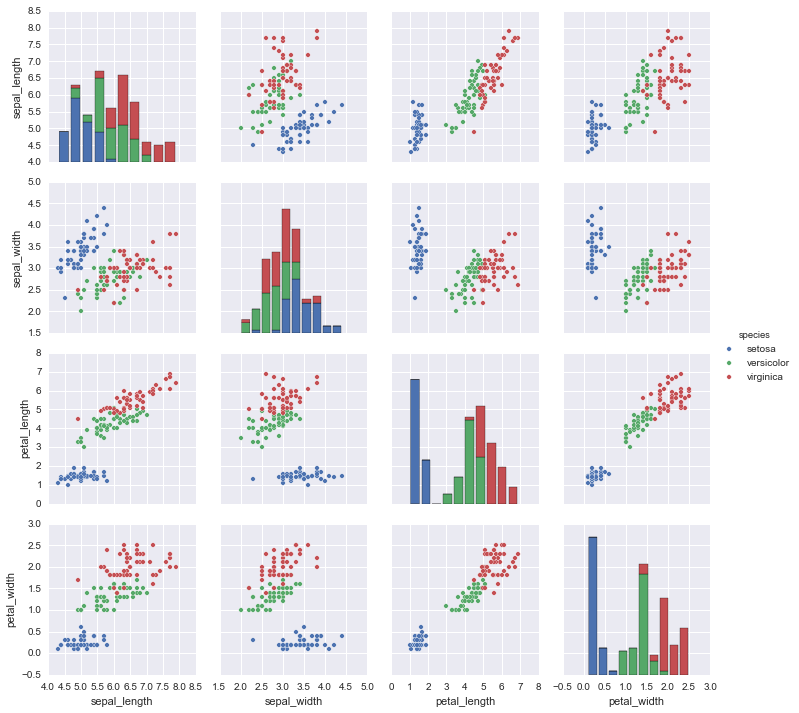

In [4]:
# ukazeme si neco malo ze seaborn knihovny
%matplotlib inline
import seaborn as sns
sns.set()

# krasna vizualizace na jednu radku
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

Reálná data samořejmě často nebývají tak pěkná jako iris, které máte na obrázku výše. Pokud mají mnoho atributů, je zobrazení matice všech dvojic, jako na obrázku výše komplikované, ale často je možné namalovat aspoň samotné histogramy, které jsou na diagonále. Ty nám mohou aspoň napovědět, jaké jsou rozsahy jednotlivých atributů a jestli se často opakují nějaké hodnoty.

Zkusme si například trochu analyzovat soubor winequality-white z UCI machine learning repository. Sama knihovna pandas po načtení dat umí vypsat nějaké základní statistiky.b

In [11]:
# panda je skvely nastroj na manipulaci s daty
import pandas as pd

data = pd.read_csv('winequality-white.csv', delimiter=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Cílem u tohoto datasetu je predikovat kvalitu vína na základě 12 změřených fyzikálních veličin. Kvalita se hodnotí na stupnici 0-10. Z výše uvedeného výstupu si můžeme hned všimnout, že v datech se vyskytují jen hodnoty od 3 do 9. Jak často se vyskytují jednotlivé třídy?

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


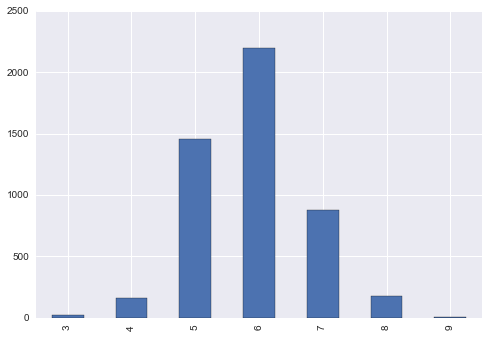

In [59]:
# spocitame a nakreslime histogram jednotlivych trid
counts = data['quality'].value_counts(sort=False).sort_index()
counts.plot(kind='bar')
print(counts)

I v tomto případě se můžeme pokusit namalovat scatterplot matrix, jako v příkladu s irisy, a dokonce se ho po nějaké (ne moc dlouhé) době dočkáme. Jestli je takový obrázek užitečný, nechám na vašem uvážení. 

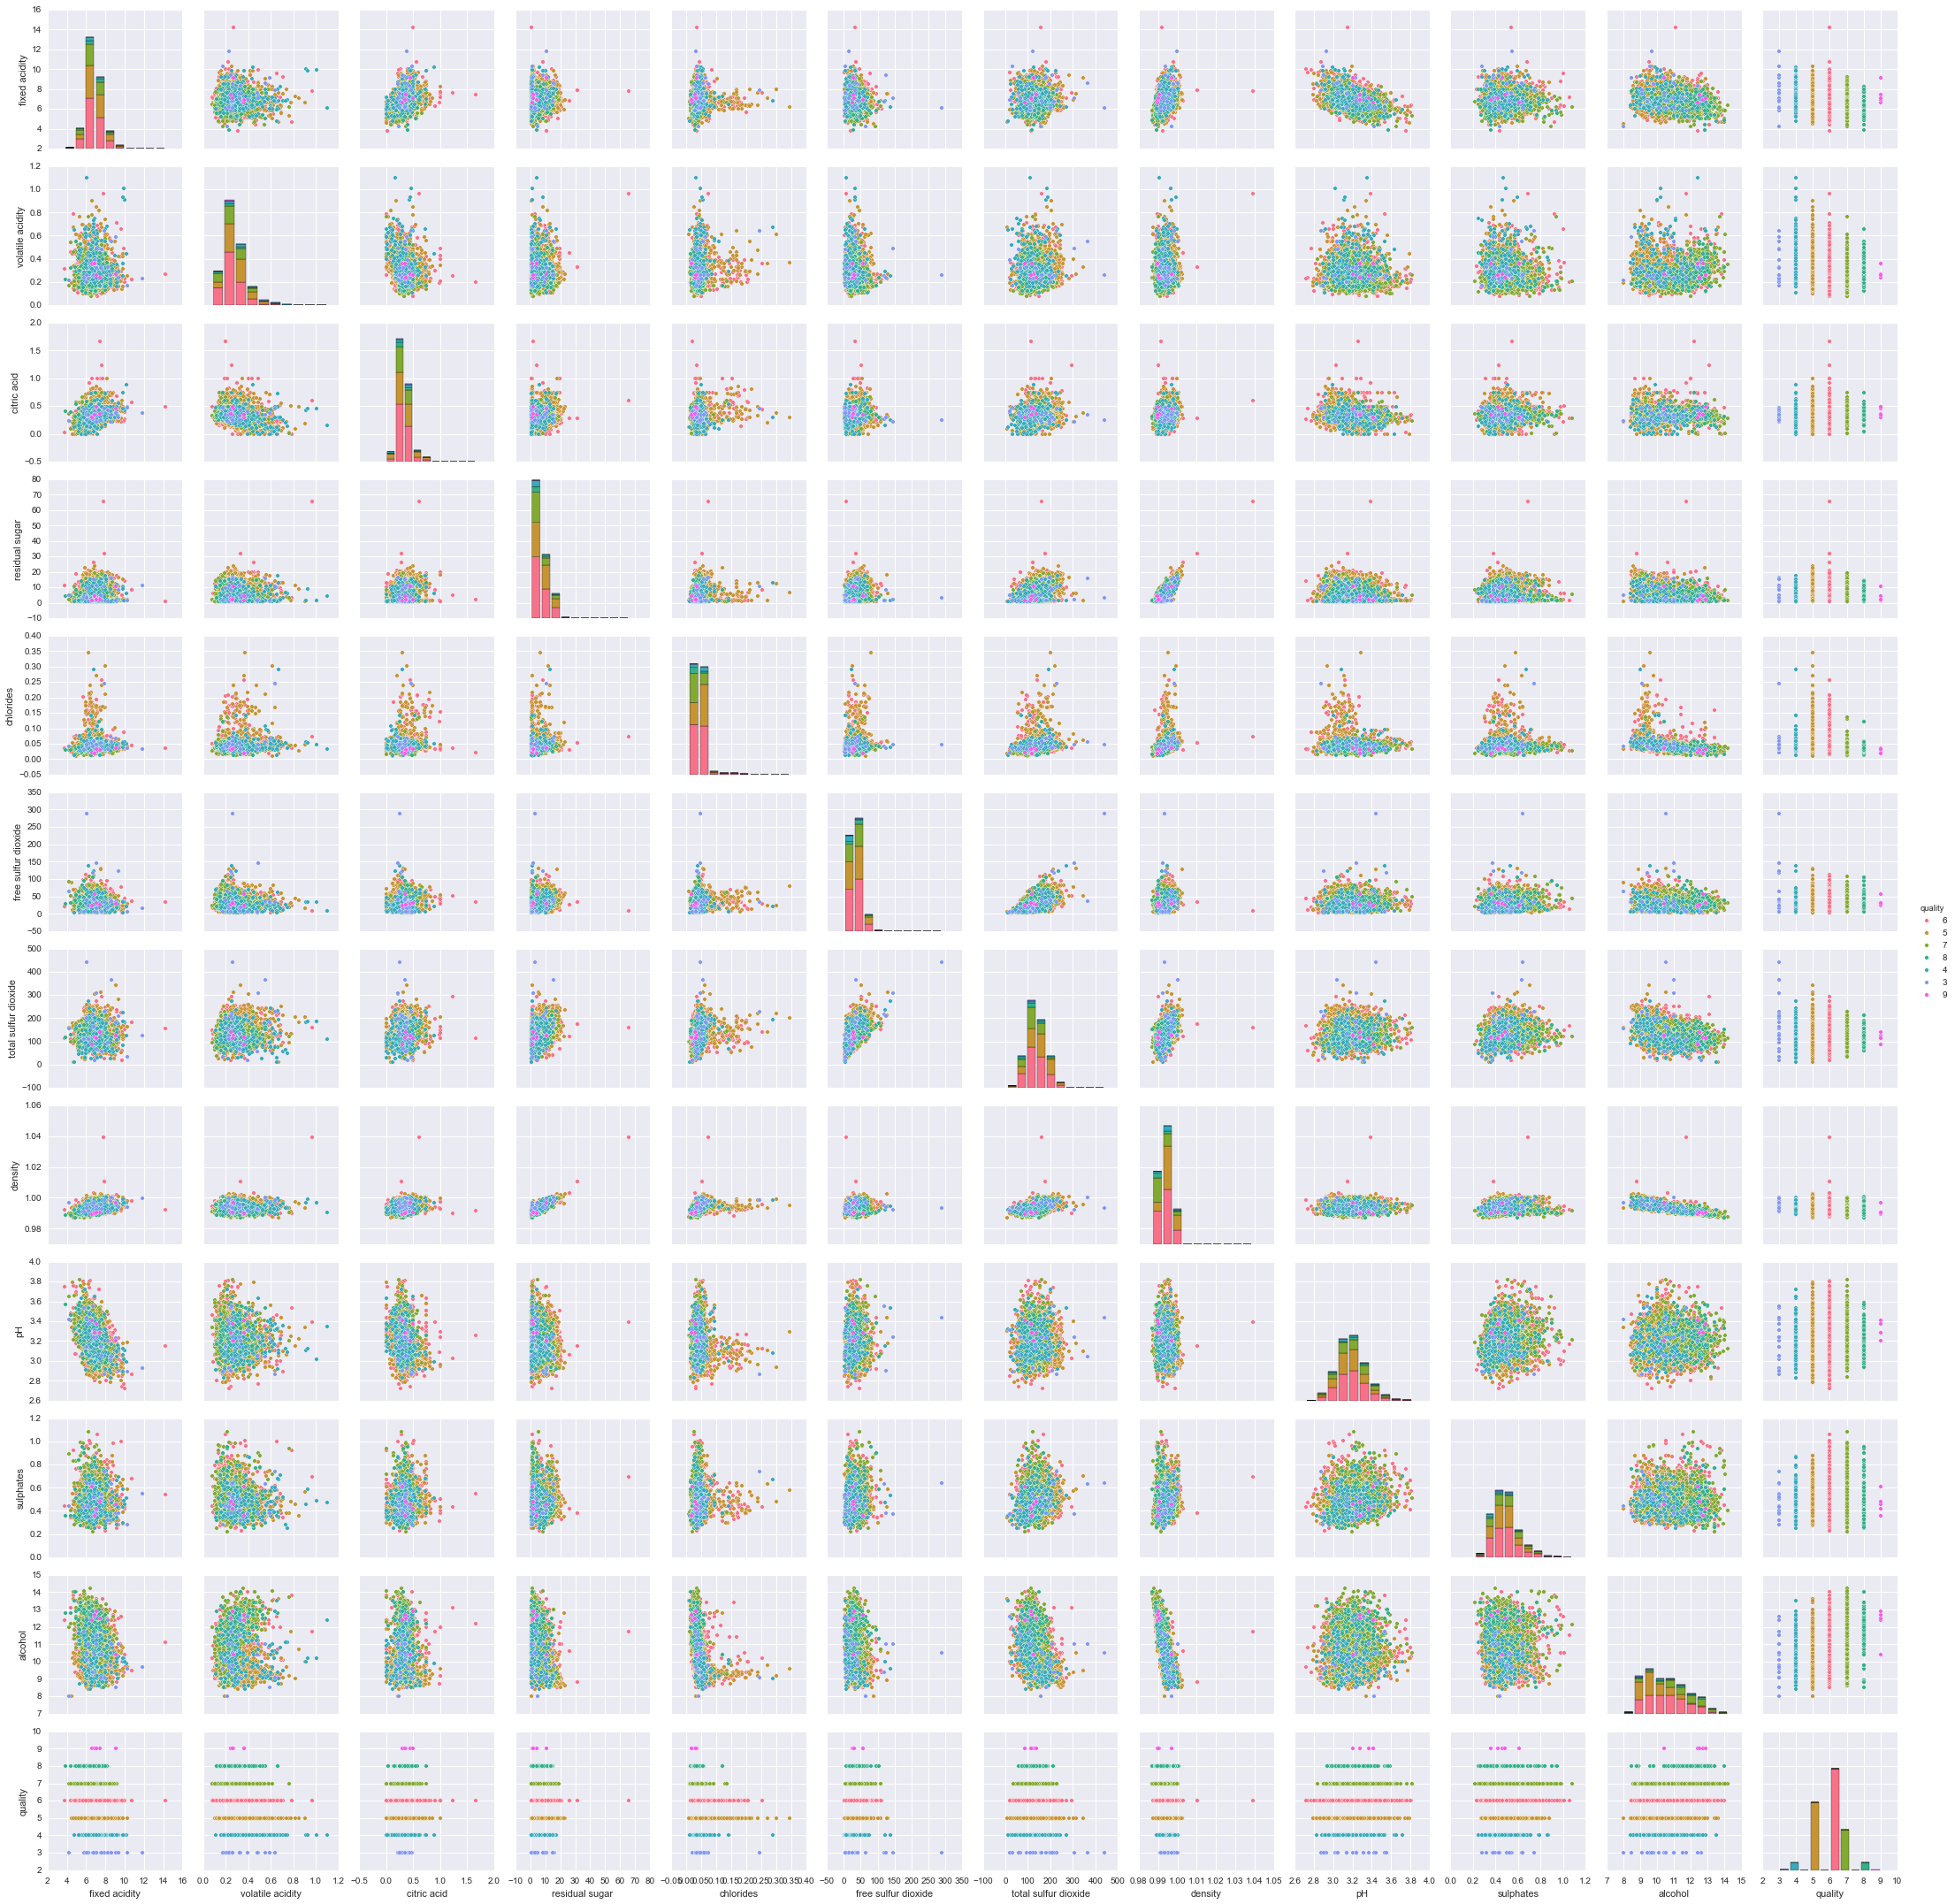

In [20]:
# znama vizualizace, tentokrat pro vetsi data
sns.pairplot(data, hue='quality')

Je ale možné si vybrat i jen některé proměnné.

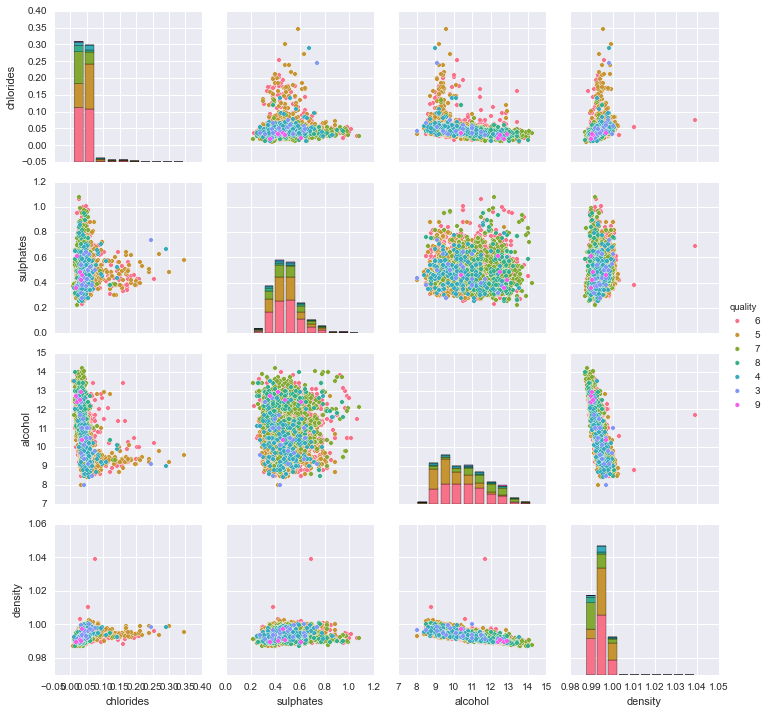

In [21]:
sns.pairplot(data, hue='quality', vars=['chlorides', 'sulphates', 'alcohol', 'density'])

Zkusme se teď podívat na korelaci jednotlivých atributů s cílovou třídou.

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


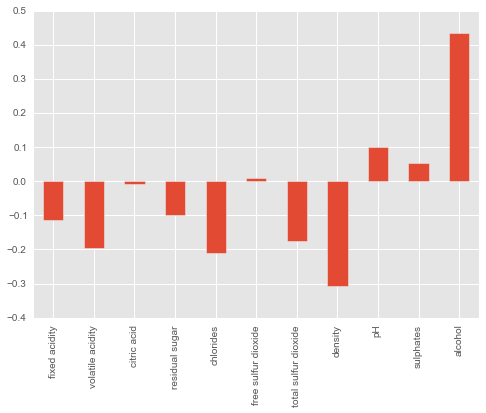

In [145]:
# spocitame korelace s cilovou tridou (ve skutecnosti vsechny a nechame si jen ty s cilovou tridou)
corr = data.corr()['quality'].drop('quality')
corr.plot(kind='bar')
print(corr)
# vypiseme celou korelacni matici vsech atributu proti sobe
data.corr()

Další možností, jak zobrazit vícerozměrná data je promítnout je do 2D pomocí nějaké techniky na snížení dimenzionality, např. PCA, nebo t-SNE (o obou metodách si více povíme někdy později). **Pozor, t-SNE počítá relativně dlouho, řádově minuty na těchto datech a mém NB**.

In [41]:
# zkusime jeste snizit dimenzionalitu dat
from sklearn import decomposition
from sklearn import manifold

attr = data.drop('quality', axis=1)

# pomoci PCA
clf = decomposition.PCA(n_components=2)
data2Dpca = clf.fit_transform(attr)

# a pomoci t-SNE
clf2 = manifold.t_sne.TSNE(n_components=2)
data2Dtsne = clf2.fit_transform(attr)

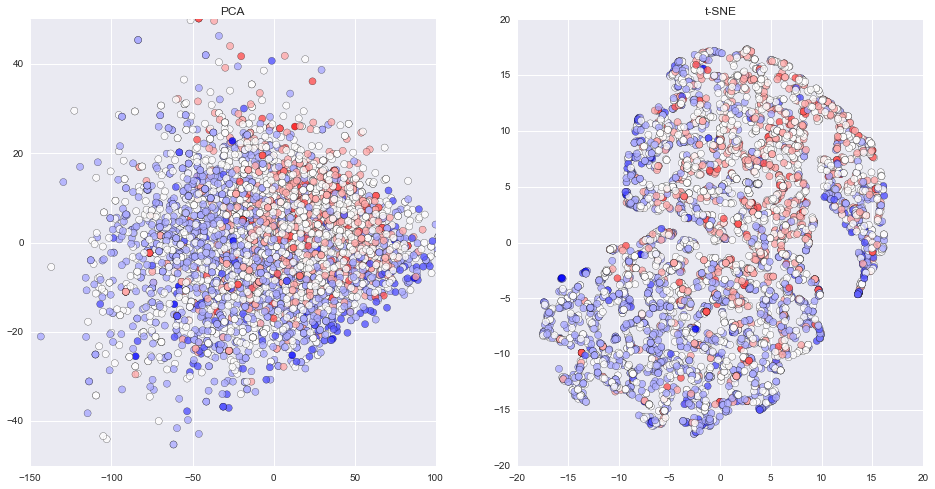

In [54]:
# nakreslime projekce pomoci PCA a pomoci t-SNE
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(data2Dpca[:, 0], data2Dpca[:, 1], c=data.quality, cmap=plt.get_cmap('bwr'), s=50, alpha=0.8)
plt.ylim([-50, 50])
plt.xlim([-150, 100])
plt.title('PCA')
plt.subplot(1,2,2)
plt.scatter(data2Dtsne[:, 0], data2Dtsne[:, 1], c=data.quality, cmap=plt.get_cmap('bwr'), s=50, alpha=0.8)
plt.title('t-SNE')
plt.show()

Podívejme se ještě na pár dalších vizualizací, které se nám mohou hodit. Zmiňovali jsme, že zajímavý může být histogram jednotlivých proměnných.

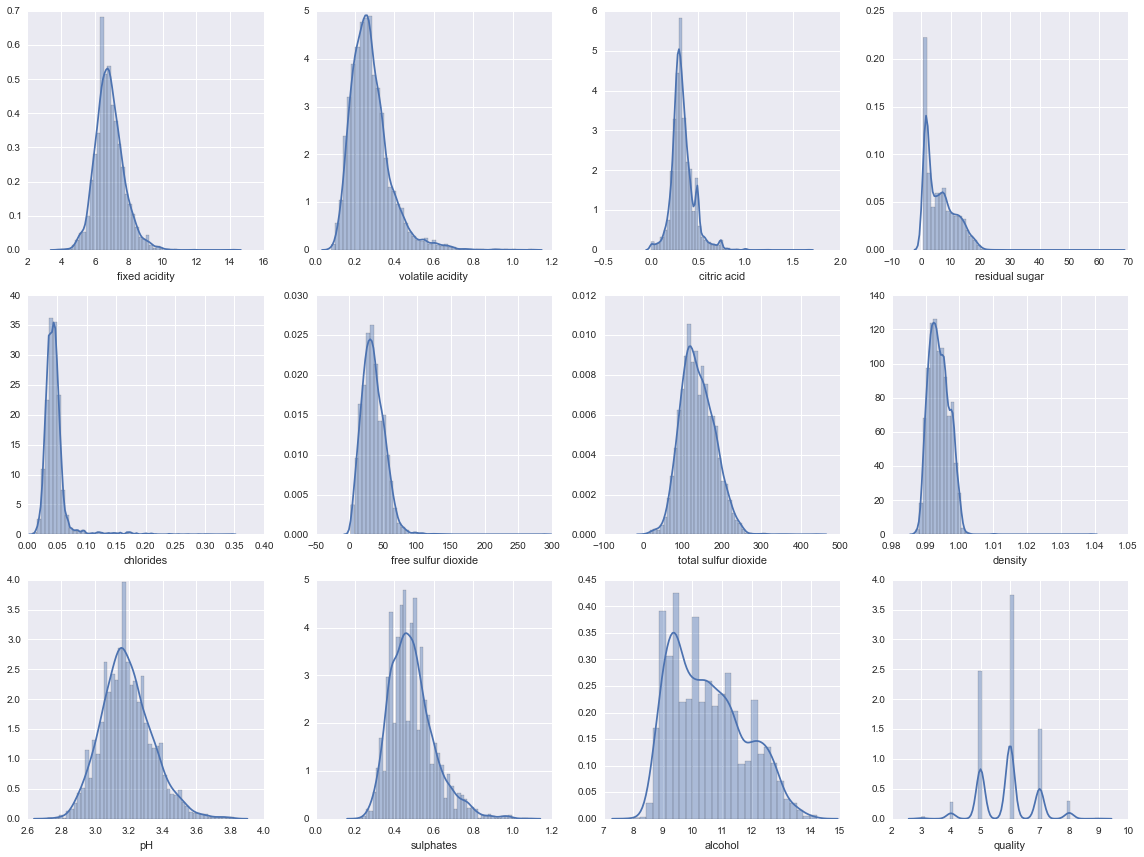

In [91]:
# zobrazeni histogramu jednotlivbych atributu
fig, axs = plt.subplots(3,4)
fig.set_size_inches(16,12)
axs = axs.ravel()
for col, ax in zip(data.columns.values, axs):
    sns.distplot(data[col], ax=ax)    

plt.tight_layout()

Před chvíli jsme zjistili největší korelaci mezi obsahem alkoholu a kvalitou, jak tedy vypadá závislost kvality na obsahu alkoholu?

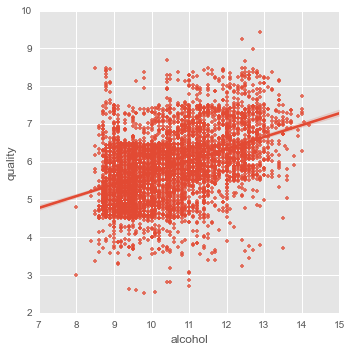

In [149]:
# zavislost obsahu alkoholu a kvality s prolozenou primou z linearni regrese
sns.lmplot('alcohol', 'quality', data=data, y_jitter=0.5, markers='+')

Zkusme si ještě na závěr natrénovat pár modelů a podívat se, jak fungují. Zkusíme náhodné lesy, jednou pro klasifikaci a jednou pro regresi. U podobně zadaného úkolu, kde máme odhadovat hodnocení není totiž úplně jasné, co bude fungovat lépe.

In [150]:
import numpy as np
from sklearn import ensemble
from sklearn import cross_validation
from sklearn import metrics
import ml_metrics as mm

# rozdelime mnozinu na testovaci a trenovaci
train_x, test_x, train_y, test_y = cross_validation.train_test_split(attr, data['quality'], test_size=0.25, random_state=123)

# natrenujeme klasifikator a regresor
clf = ensemble.RandomForestClassifier(n_estimators=100)
reg = ensemble.RandomForestRegressor(n_estimators=100)

clf.fit(train_x, train_y)
reg.fit(train_x, train_y)

clf_y = clf.predict(test_x)
reg_y = reg.predict(test_x)

# u regrese je jeste treba vysledky zaokrouhlit a ujistit se, ze nejme mimo povolene tridy
reg_y = np.round(reg_y).astype(int)
reg_y[reg_y<3] = 3
reg_y[reg_y>9] = 9

# a vypiseme nejake statistiky
print('Classification accuracy: %.3f' % metrics.accuracy_score(test_y, clf_y))
print('Classification quadratic kappa: %.3f' % mm.quadratic_weighted_kappa(test_y, clf_y))
print(metrics.classification_report(test_y, clf_y))
cm_clf = metrics.confusion_matrix(test_y, clf_y)
print(cm_clf)

print('Regression: %.3f' % metrics.accuracy_score(test_y, reg_y))
print('Regression quadratic kappa: %.3f' % mm.quadratic_weighted_kappa(test_y, reg_y))
print(metrics.classification_report(test_y, reg_y))
cm_reg = metrics.confusion_matrix(test_y, reg_y)
print(cm_reg)

Classification accuracy: 0.677
Classification quadratic kappa: 0.651
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.80      0.21      0.33        38
          5       0.68      0.67      0.68       362
          6       0.67      0.78      0.72       574
          7       0.65      0.57      0.61       198
          8       0.85      0.37      0.52        46
          9       0.00      0.00      0.00         3

avg / total       0.68      0.68      0.67      1225

[[  0   0   1   3   0   0   0]
 [  0   8  19  11   0   0   0]
 [  0   1 242 116   3   0   0]
 [  0   1  84 449  39   1   0]
 [  0   0   8  75 113   2   0]
 [  0   0   0  11  18  17   0]
 [  0   0   0   2   1   0   0]]
Regression: 0.656
Regression quadratic kappa: 0.636
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.83      0.13      0.23        38
          5       0.6

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
